In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [41]:
df = pd.DataFrame({
    "area": [2600, 3000, 3200, 3600, 4000],
    "price": [550000, 565000, 610000, 680000, 720000]
})

Text(0, 0.5, 'price(US$)')

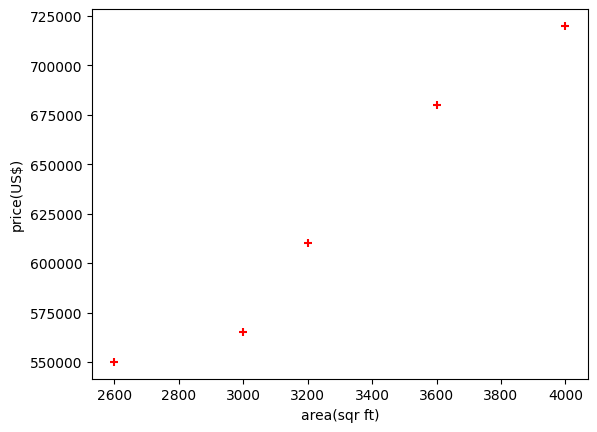

In [42]:
%matplotlib inline
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')

In [43]:
reg = LinearRegression()
reg.fit(df[['area']], df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
reg.predict([[3300]])

c:\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([627654.10958904])

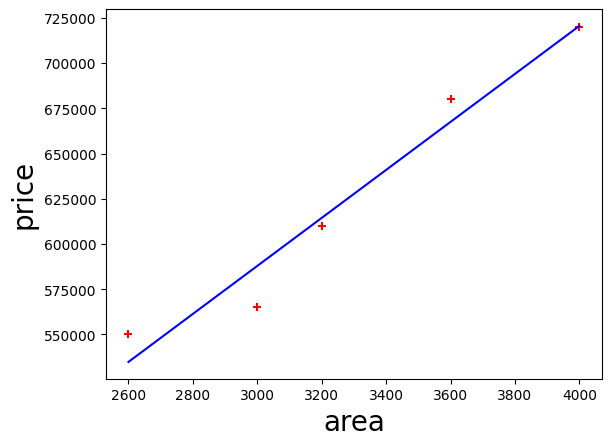

In [45]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker="+")
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [46]:
df1 = pd.read_csv("canada_per_capita_income.csv")
df1 = df1.rename(columns={'per capita income (US$)': 'per_capita_income'})
df1

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


Text(0, 0.5, 'Income')

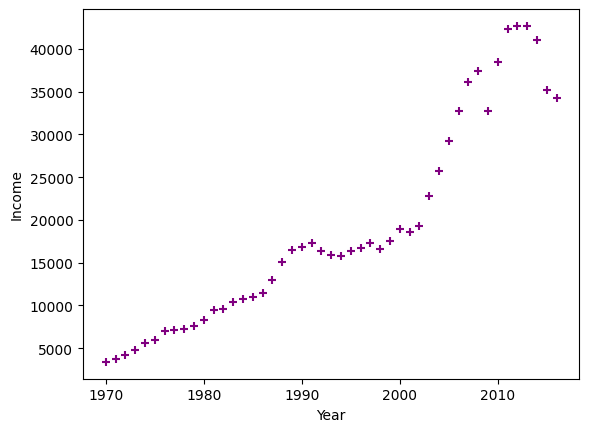

In [47]:
%matplotlib inline
plt.scatter(df1['year'], df1['per_capita_income'], color='purple', marker='+')
plt.xlabel('Year')
plt.ylabel('Income')

In [48]:
reg1 = LinearRegression()
reg1.fit(df1[['year']], df1['per_capita_income'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
df1.iloc[-1]

year                  2016.00000
per_capita_income    34229.19363
Name: 46, dtype: float64

In [50]:
reg1.predict([[2017]])

c:\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38803.29886875])

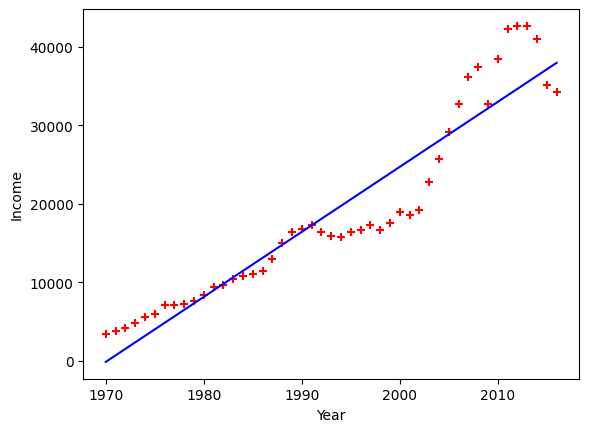

In [51]:
%matplotlib inline
plt.scatter(df1['year'], df1['per_capita_income'], color="red", marker="+")
plt.xlabel('Year')
plt.ylabel('Income')
plt.plot(df1['year'], reg1.predict(df1[['year']]), color='blue')

### Multiple Linear Regression

In [52]:
df2 = pd.DataFrame({
    'area': [2600, 3000, 3200, 3600, 4000],
    'bedrooms': [3, 4, None, 3, 5],
    'age': [20, 15, 18, 30, 8],
    'price': [550000, 565000, 610000, 595000, 760000]
})
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [53]:
import math
median_bedroom = math.floor(df2['bedrooms'].median())
df2['bedrooms'] = df2.bedrooms.fillna(median_bedroom)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [54]:
reg3 = LinearRegression()
reg3.fit(df2[['area', 'bedrooms', 'age']], df2['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
reg3.intercept_

np.float64(383724.9999999998)

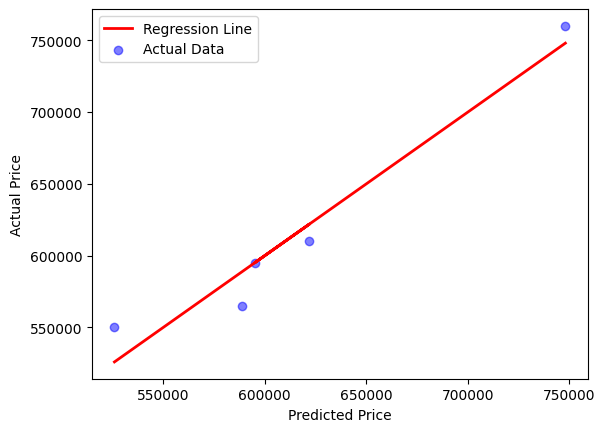

In [56]:
import matplotlib.pyplot as plt

# Get the predictions
y_pred = reg3.predict(df2[['area', 'bedrooms', 'age']])

# Plotting predictions against predictions creates a 45-degree straight line
plt.plot(y_pred, y_pred, color='red', linewidth=2, label='Regression Line')

# Usually, you'd scatter the actual data around this line
plt.scatter(y_pred, df2['price'], color='blue', alpha=0.5, label='Actual Data')

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.legend()
plt.show()

In [57]:
df3 = pd.DataFrame({
    'experience': [None, None, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
    'test_score': [8, 8, 6, 10, 9, 7, None, 7],
    'interview_score': [9, 6, 7, 10, 6, 10, 7, 8],
    'salary': [50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000]
})
df3

,experience,test_score,interview_score,salary
0,None,8.0,9,50000
1,None,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [59]:
from word2number import w2n

In [72]:
def convert_exp(x):
    val = 0
    if pd.isnull(x): # Handles NaN/None
        val += 1
        return val   # Or return x if you want to keep it empty
    try:
        return w2n.word_to_num(str(x))
    except ValueError:
        return x     # Returns the original value if it's already a number

df3['experience'] = df3['experience'].apply(convert_exp)
df3.loc[0, 'experience'] = 1
df3.loc[1, 'experience'] = 2
df3['test_score'] = df3['test_score'].fillna(8)
df3

,experience,test_score,interview_score,salary
0,1,8.0,9,50000
1,2,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [73]:
reg4 = LinearRegression()
reg4.fit(df3[['experience', 'test_score', 'interview_score']], df3['salary'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
reg4.predict([[7, 8, 6]])

c:\Anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63723.89026257])